In [5]:
using Random
using Distributions
using Erdos

g = random_regular_graph(10,3,seed=17)


┌ Info: Precompiling Erdos [90d7349d-81aa-5495-813a-883243abfe31]
└ @ Base loading.jl:1273


Graph{Int64}(10, 15)

In [188]:
#n = 10
#graph = Dict()
#for i=1:n
#    graph[i]=[]
#end

#edges =[]
#p = 0.5

#for i=1:n
#    for j=1:i-1
#        r = rand(1)
#        if  r[1]< p
#            append!(edges,[(i,j)])
#        end
#    end
#end

#for i = 1:length(edges)
#    a,b=edges[i]
#    append!(graph[a],b)
#    append!(graph[b],a)
#end

function Graph(n,p)
   graph = Dict()
   for i=1:n
    graph[i]=[]
   end
   
   edges =[]
   for i=1:n
    for j=1:i-1
        r = rand(1)
        if  r[1]< p
            append!(edges,[(i,j)])
        end
    end
   end
   
   for i = 1:length(edges)
    a,b=edges[i]
    append!(graph[a],b)
    append!(graph[b],a)
   end
    
  return graph
end

b=Graph(3,.1)
print(b)

Dict{Any,Any}(2 => Any[],3 => Any[],1 => Any[])

In [220]:
collection = Set{Int32}() # conjunto de la coleccion


visited = [] 
queue = []     

function bfs(visited,graph,node)
    append!(visited,node)
    append!(queue,node)
    
    
    while length(queue)!=0
        s = pop!(queue)
        v = graph[s]
        #print('\n')
        #print(queue)
        
        for i=1:length(v)
            if in(v[i],visited) != true
               append!(visited,v[i])
               append!(queue,v[i])
            end
        end
    end
end


bfs (generic function with 1 method)

In [205]:
print(visited)

Any[1, 21, 62, 10, 77, 83, 97, 38, 73]

In [229]:
nlist = [10, 100, 1000]
c = range(-5,stop=5,length=10)
gresult = []

for i in nlist
    rlist = []
    for j in c
        con = 0
        p = (log(i)/i) + (j/i)
        for k=1:10
            G =  Graph(i,p)
            visited = [] 
            queue = []
            bfs(visited,G,1)
            if(length(visited)== i)
                con = con+1
            end
            visited = []       
        end
        result = con/10
        append!(rlist,result)
    end
    append!(gresult,[rlist])  
end

In [226]:
print(gresult)

Any[Any[0.0, 0.0, 0.0, 0.0, 0.4, 0.7, 0.9, 1.0, 1.0, 1.0], Any[0.0, 0.0, 0.0, 0.0, 0.1, 0.7, 0.7, 0.9, 0.9, 1.0]]

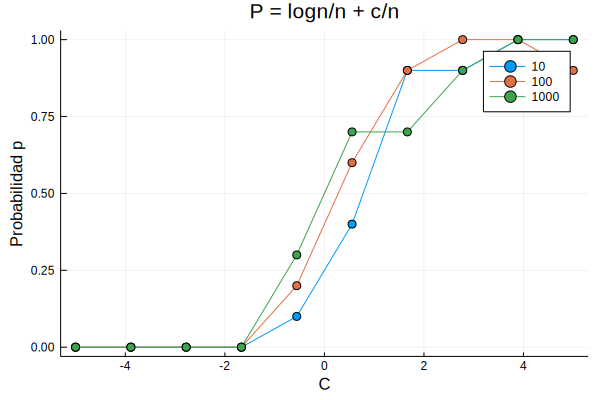

In [230]:
# Graficando resultados

using Plots
#datos = [P1 P2 P3 P4]
labels= ["10" "100" "1000"]
markershapes= [:circle]
plot(c,gresult, title = "P = logn/n + c/n", labels = labels, shape=markershapes)
xlabel!("C")
ylabel!("Probabilidad p")